# Alireza Farajtabrizi (97102185) Lab2


In [39]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### متاسفانه داده های آموزشی تعدادشان کافی نیست یا مناسب نیستند چون بسته به ران های مختلف معمولا ترین ارور بیشتر از تست ارور است و نتایج غیر منطقی زیاد رخ می دهد

## Part 1

### Importing Libraries

In [40]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Spliting Data Set

In [41]:
from sklearn.model_selection import train_test_split
#importing the data set and split them to train and test set

df = pd.read_csv('ozon.csv')
df = np.array(df)

X_train, X_test, y_train, y_test = train_test_split(df[:,0:3], df[:,3], train_size=0.8,random_state=np.random.randint(100))

### Fitting the Model and Finding the Mean Square Error

In [42]:
from sklearn.linear_model import LinearRegression
#using the sklearn functions to fit the model and the coefficient

model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)

[ 0.05931262  1.75069948 -2.90508363]


In [43]:
from sklearn.metrics import mean_squared_error
#using the sklearn functions to calculate the mean square error between train and test lable and predicted lable

print("Train MSE :",mean_squared_error(y_train, model.predict(X_train)))
print("Test  MSE :",mean_squared_error(y_test, model.predict(X_test)))

Train MSE : 333.3891690502285
Test  MSE : 821.7223977360826


### Adding Noise with Different Variance to Data and Plotting the MSE 

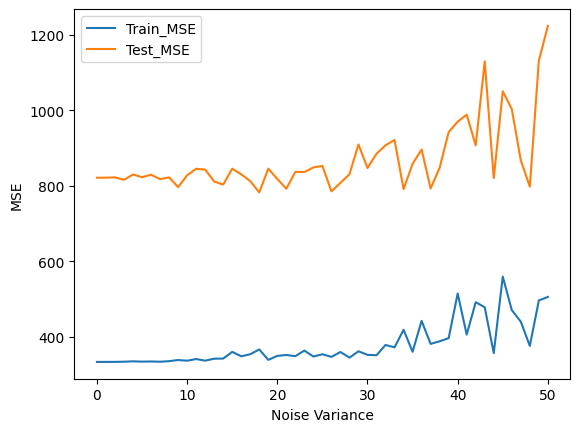

In [44]:
train_MSE = np.zeros(51)
test_MSE  = np.zeros(51)

#using the np random array to add gaussian noise
for i in range(51):
    noise = np.random.normal(0, i, y_train.shape)
    y_noisy = y_train + noise
    
    model = LinearRegression()
    model.fit(X_train,y_noisy)
    
    train_MSE[i] = mean_squared_error(model.predict(X_train), y_train)
    test_MSE[i]  = mean_squared_error(model.predict(X_test), y_test)

plt.figure()
plt.plot(np.arange(51), train_MSE)
plt.plot(np.arange(51), test_MSE)
plt.legend(['Train_MSE', 'Test_MSE'])
plt.xlabel('Noise Variance')
plt.ylabel('MSE')
plt.show()

##### در کل تاثیر نویز روی تست بیشتر از ترین است و خب این تاثیر با افزایش  واریانس بیشتر و مشهود تر نیز می شود

### Adding the Square of each Feature to Data and Comparing MSE

In [45]:
X_train2 = np.append(X_train,np.square(X_train),axis=1)
X_test2  = np.append(X_test,np.square(X_test),axis=1)

model.fit(X_train2,y_train)

print("Train MSE :",mean_squared_error(y_train, model.predict(X_train2)))
print("Test  MSE :",mean_squared_error(y_test, model.predict(X_test2)))

Train MSE : 233.22343462730507
Test  MSE : 697.4531705412381


#### با این کار هر دو ارور کاهش میابد و این به این معنی است که خروجی به توان دو فیچر ها نیز وابسته است

## Part 2

In [46]:
from os import listdir
from skimage import io
import random

folder_dir = 'Surprise Videos'
folder_name = []

for folder in listdir(folder_dir):
    folder_name.append(folder)
    
folder_name_train = random.sample(folder_name,20)
folder_name_test  = set(folder_name)-set(folder_name_train)

X_train = []
y_train = []

for folder in folder_name_train:
    for file in listdir(folder_dir+'/'+folder):
        img = io.imread(folder_dir+'/'+folder+'/'+file,as_gray=True)
        X_train.append(img.reshape(img.shape[0]*img.shape[1]))
        N = len(listdir(folder_dir+'/'+folder))
    y_train = np.append(y_train,np.linspace(0, 100, N))

X_train = np.array(X_train)
y_train = y_train/100



X_test = []
y_test = []

for folder in folder_name_test:
    for file in listdir(folder_dir+'/'+folder):
        img = io.imread(folder_dir+'/'+folder+'/'+file,as_gray=True)
        X_test.append(img.reshape(img.shape[0]*img.shape[1]))
        N = len(listdir(folder_dir+'/'+folder))
    y_test = np.append(y_test,np.linspace(0, 100, N))

X_test = np.array(X_test)
y_test = y_test/100

N1 = img.shape[0]
N2 = img.shape[1]

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

print("Train MSE :",mean_squared_error(y_train, model.predict(X_train)))
print("Test  MSE :",mean_squared_error(y_test, model.predict(X_test)))

Train MSE : 1.860771129538154e-29
Test  MSE : 0.09181255378431098


#### بله آموزش امکان پذیر است اما خیلی طول می کشد

In [48]:
from skimage.transform import resize

n1 = int(N1/2)
n2 = int(N2/2)

X_train = []
y_train = []
for folder in folder_name_train:
    for file in listdir(folder_dir+'/'+folder):
        img = io.imread(folder_dir+'/'+folder+'/'+file,as_gray=True)
        img2 = img[n1-300:n1+300,n2-300:n2+300]
        img2 = resize(img2, (img2.shape[0] // 4, img2.shape[1] // 4), anti_aliasing=True)
        X_train.append(img2.reshape(img2.shape[0]*img2.shape[1]))
        N = len(listdir(folder_dir+'/'+folder))
    y_train = np.append(y_train,np.linspace(0, 100, N))

X_train = np.array(X_train)
y_train = y_train/100



X_test = []
y_test = []

for folder in folder_name_test:
    for file in listdir(folder_dir+'/'+folder):
        img = io.imread(folder_dir+'/'+folder+'/'+file,as_gray=True)
        img2 = img[n1-300:n1+300,n2-300:n2+300]
        img2 = resize(img2, (img2.shape[0] // 4, img2.shape[1] // 4), anti_aliasing=True)
        X_test.append(img2.reshape(img2.shape[0]*img2.shape[1]))
        N = len(listdir(folder_dir+'/'+folder))
    y_test = np.append(y_test,np.linspace(0, 100, N))

X_test = np.array(X_test)
y_test = y_test/100

In [49]:
model = LinearRegression()
model.fit(X_train,y_train)

print("Train MSE :",mean_squared_error(y_train, model.predict(X_train)))
print("Test  MSE :",mean_squared_error(y_test, model.predict(X_test)))

Train MSE : 1.5211086875882196e-30
Test  MSE : 0.17718164375733697


#### خطای تست کاهش پیدا کرده و این به این معنی است که مدل بهتر فیت شده است چون پیکسل های بدون محتوای مفید حذف شده اند. اما خطای ترین نیز کمتر شده است که این کمی غیر منطقی است برای من اما شاید دلیلش این است که با حذف حاشیه ها و جزئیات بی محتوا کلا مدل بهتر فیت می شود

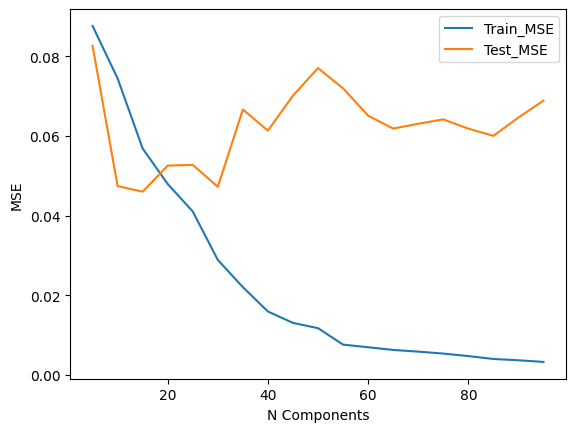

In [50]:
from sklearn.decomposition import PCA

train_MSE = []
test_MSE  = []

for i in range(5,100,5):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)   
    X_test_pca  = pca.transform(X_test)  

    model = LinearRegression()
    model.fit(X_train_pca,y_train)
    train_MSE = np.append(train_MSE,mean_squared_error(model.predict(X_train_pca), y_train))
    test_MSE  = np.append(test_MSE,mean_squared_error(model.predict(X_test_pca), y_test))

plt.figure()
plt.plot(np.arange(5,100,5), train_MSE)
plt.plot(np.arange(5,100,5), test_MSE)
plt.legend(['Train_MSE', 'Test_MSE'])
plt.xlabel('N Components')
plt.ylabel('MSE')
plt.show()

In [55]:
print("Components Count:",np.argmin(test_MSE)*5+5,"Test min MSE  :",f'{test_MSE[np.argmin(test_MSE)]:.4f}')
print("Components Count:",np.argmin(test_MSE)*5+5,"Train min MSE :",f'{train_MSE[np.argmin(test_MSE)]:.4f}')

Components Count: 15 Test min MSE  : 0.0460
Components Count: 15 Train min MSE : 0.0568


#### اولا باز هم به دلیل مخدود بودن داده آموزشی نتایج خیلی متغیر است و هر بار یک تعداد بردار ویژه متفاوت کمترین ارور تولید میکند، اما معمولا کمتر از 30 است. نکته قابل توجه کمتر بودن با فاصله ی تست ارور نسبت به حالت قبل است که به دلیل تغییرات داده شده در مدل به کمک پی سی ای مدل خیلی بهتر فیت شده اما ترین ارور افزایش فاحشی داشته است که با توجه به کاهش بعد شدید طبیعی است.